the main figure of the paper.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
from tang_jcompneuro.model_fitting_postprocess import load_data_generic

In [3]:
def modelname_alternative(model_type, model_subtype, _1, _2):
    if model_type == 'cnn':
        suffix = model_subtype.upper() if model_subtype.startswith('b.') else model_subtype
    elif model_type == 'gabor':
        # TODO may need change for multi ori models.
        suffix = model_subtype
    elif model_type == 'glm':
        if model_subtype.startswith('all'):
            suffix = model_subtype
        else:
            suffix, _ = model_subtype.split('_')
            assert _ == 'poisson'
    else:
        raise NotImplementedError
    # dollar is later used to find those relevant models.
    return f'{model_type}${suffix}'
    # well, I guess I don't need to be that fancy.
    # just manually doing it should be fine.
    # also more flexible, as I can control order more freely.
#     reutr
    


def check_all(squared, score_col_name):
    models_to_examine = [
        ('cnn', 'b.2'),
        ('cnn', 'b.4'),
        ('cnn', 'b.9'),
        ('cnn', 'all', True, False, ('b.2', 'b.4', 'b.9', )),
        ('cnn', 'all_overfit', True, True, ('b.2', 'b.4', 'b.9', )),
        ('gabor', 'simple'),
        ('gabor', 'complex'),
        ('gabor', 'multi,1,1'),
        ('gabor', 'multi,1,2'),
        ('gabor', 'all', True, False, ('simple', 'complex', 'multi,1,1', 'multi,1,2')),
        ('gabor', 'all_overfit', True, True, ('simple', 'complex', 'multi,1,1', 'multi,1,2')),
        ('glm', 'fpower_poisson'),
        ('glm', 'linear_poisson'),
        ('glm', 'gqm.2_poisson'),
        ('glm', 'gqm.4_poisson'),
        ('glm', 'gqm.8_poisson'),
        ('glm', 'all', True, False, ('fpower_poisson', 'linear_poisson', 'gqm.2_poisson', 'gqm.4_poisson', 'gqm.8_poisson')),
        ('glm', 'all_overfit', True, True, ('fpower_poisson', 'linear_poisson', 'gqm.2_poisson', 'gqm.4_poisson', 'gqm.8_poisson')),
    ]
    
    
    return load_data_generic(models_to_examine, load_naive=False, metric='ccnorm_5', squared=squared,
                            score_col_name=score_col_name, modelname_alternative=modelname_alternative,
#                             datasets_to_check=('MkA_Shape',)
                            )


In [4]:
df_all_cc2 = check_all(squared=True, score_col_name='cc2').xs(100, level='percentage').sort_index()

MkA_Shape all
MkA_Shape OT
MkE2_Shape all
MkE2_Shape OT


In [5]:
HO_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['HO']['mean'], axis=1).unstack('subset')
HO_neuron_perf

subset                              OT       all
dataset    model                                
MkA_Shape  cnn$B.2            0.209741  0.364272
           cnn$B.4            0.219618  0.405035
           cnn$B.9            0.232761  0.424384
           cnn$all            0.223155  0.422374
           cnn$all_overfit    0.267580  0.438486
           gabor$all          0.190589  0.245552
           gabor$all_overfit  0.253350  0.259363
           gabor$complex      0.196395  0.155822
           gabor$multi,1,1    0.186224  0.225227
           gabor$multi,1,2    0.190472  0.247786
           gabor$simple       0.135204  0.159118
           glm$all            0.159399  0.277450
           glm$all_overfit    0.206760  0.289893
           glm$fpower         0.158648  0.186996
           glm$gqm.2          0.122783  0.236626
           glm$gqm.4          0.128318  0.255681
           glm$gqm.8          0.124440  0.251566
           glm$linear         0.114884  0.123476
MkE2_Shape cnn$B.2            0.212439  0.348592
           cnn$B.4            0.221278  0.378593
           cnn$B.9            0.229838  0.396948
           cnn$all            0.225551  0.395258
           cnn$all_overfit    0.264643  0.413148
           gabor$all          0.184690  0.250839
           gabor$all_overfit  0.245762  0.271811
           gabor$complex      0.193234  0.168861
           gabor$multi,1,1    0.178395  0.230079
           gabor$multi,1,2    0.184969  0.249708
           gabor$simple       0.116399  0.155465
           glm$all            0.155121  0.288130
           glm$all_overfit    0.197910  0.306412
           glm$fpower         0.143874  0.176236
           glm$gqm.2          0.127881  0.255035
           glm$gqm.4          0.130375  0.272207
           glm$gqm.8          0.120617  0.262885
           glm$linear         0.105756  0.133198

In [6]:
OT_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['OT']['mean'], axis=1).unstack('subset')
OT_neuron_perf

subset                              OT       all
dataset    model                                
MkA_Shape  cnn$B.2            0.428533  0.438926
           cnn$B.4            0.450794  0.475739
           cnn$B.9            0.473150  0.507491
           cnn$all            0.466522  0.507279
           cnn$all_overfit    0.499850  0.514784
           gabor$all          0.386621  0.335773
           gabor$all_overfit  0.437013  0.343738
           gabor$complex      0.341311  0.239228
           gabor$multi,1,1    0.355975  0.312663
           gabor$multi,1,2    0.387477  0.335995
           gabor$simple       0.216447  0.205305
           glm$all            0.331640  0.377881
           glm$all_overfit    0.378053  0.386489
           glm$fpower         0.299176  0.237842
           glm$gqm.2          0.246806  0.326529
           glm$gqm.4          0.280782  0.359889
           glm$gqm.8          0.277170  0.351061
           glm$linear         0.178910  0.164772
MkE2_Shape cnn$B.2            0.461793  0.465612
           cnn$B.4            0.490762  0.507013
           cnn$B.9            0.514725  0.540943
           cnn$all            0.503059  0.537156
           cnn$all_overfit    0.542438  0.546381
           gabor$all          0.397402  0.378389
           gabor$all_overfit  0.464611  0.389072
           gabor$complex      0.370702  0.276991
           gabor$multi,1,1    0.378517  0.352416
           gabor$multi,1,2    0.396189  0.378654
           gabor$simple       0.237685  0.221754
           glm$all            0.346004  0.436168
           glm$all_overfit    0.396261  0.450445
           glm$fpower         0.289153  0.250836
           glm$gqm.2          0.308030  0.415099
           glm$gqm.4          0.308235  0.433565
           glm$gqm.8          0.289890  0.413524
           glm$linear         0.231406  0.232404

In [7]:
import os.path
from tang_jcompneuro import dir_dictionary
from collections import OrderedDict

In [8]:
from tang_jcompneuro.plotting import (image_subset_and_neuron_subset_list,
                                     show_one_main, 
                                     )

In [9]:
def define_data_meta():
    data_groups_this = OrderedDict()
    data_groups_this['cnn'] = {
        'models': ('B.2', 'B.4', 'B.9'),
        'all': True,
    }
    
    data_groups_this['gabor'] = {
        'models': ('simple', 'complex', 'multi,1,1', 'multi,1,2'),
        'all': True,
    }
    
    data_groups_this['glm'] = {
        'models': ('fpower', 'linear', 'gqm.2', 'gqm.4', 'gqm.8'),
        'all': True,
    }
    return data_groups_this

In [10]:
def fetch_data(dataset, img_subset, neuron_subset, model_type, model_subtype):
    if neuron_subset == 'OT':
        return OT_neuron_perf.at[(dataset, f'{model_type}${model_subtype}'), img_subset]
    elif neuron_subset == 'HO':
        return HO_neuron_perf.at[(dataset, f'{model_type}${model_subtype}'), img_subset]
    else:
        raise NotImplementedError

In [11]:
# ok. time to work on plots.
# based on https://github.com/leelabcnbc/tang_jcompneuro/blob/master/thesis_plots/v1_fitting/results_basic.ipynb
def draw_one_stuff(dataset, save=None):
    
    monkey = {'MkA_Shape': 'A', 'MkE2_Shape': 'B'}[dataset]
    
    # draw one by one.
    num_panel = len(image_subset_and_neuron_subset_list)
    
    plt.close('all')
    fig, axes = plt.subplots(1, num_panel, sharex=True, sharey=True, squeeze=False,
                            figsize=(8,2.5))
    for idx, (ax, (img_subset, neuron_subset)) in enumerate(zip(axes.ravel(), image_subset_and_neuron_subset_list)):
#         data_x = df_all_cc2.at[('MkA_Shape', img_subset, model_name_x_real), 'cc2'][neuron_subset]['raw']
#         data_y = df_all_cc2.at[('MkA_Shape', img_subset, model_name_y_real), 'cc2'][neuron_subset]['raw']
#         show_one_basic(data_x, data_y, title=f'{neuron_subset} neurons\n{img_subset} stimuli',
#                       ax=ax,mean_title='mean $CC_\mathrm{norm}^2$', xlabel=model_name_x,
#                       ylabel=model_name_y  if idx == 0 else None)
        print(img_subset, neuron_subset)
        
        # gather data.
        
        stat_sub_array = []
        stat_all_array = []
        stat_name_array = []
        
        for group_name, group_meta in define_data_meta().items():
            print(group_name)
            # first gather all useful data.
            data_sub_this = list(zip(group_meta['models'], [fetch_data(dataset, img_subset, neuron_subset, group_name, model_subtype) for 
                             model_subtype in group_meta['models']]))
            if group_name == 'cnn':
                print(data_sub_this)
            data_all_this = fetch_data(dataset, img_subset, neuron_subset, group_name, 'all') if group_meta['all'] else None
            print(data_all_this)
            stat_sub_array.append(data_sub_this)
            stat_all_array.append(data_all_this)
            stat_name_array.append(group_name)
            
        # ok. pass into my fancy function and draw!
        show_one_main(stat_sub_array, stat_all_array, stat_name_array,
                     ax=ax, ylabel='mean $CC_\mathrm{norm}^2$' if idx == 0 else None,
                      title=f'{neuron_subset} neurons\n{img_subset} stimuli')
        
    
        
    fig.suptitle(f'model performance on monkey {monkey}')
    # adjust figure 
    fig.subplots_adjust(top=0.75, bottom=0.05, left=0.07, right=1, hspace=0.1, wspace=0.05)
    
    if save is not None:
        save_dir = os.path.join(dir_dictionary['plots'], 'main', 'cnn_vs_others')
        os.makedirs(save_dir, exist_ok=True)
        fig.savefig(os.path.join(save_dir, f'{save}.pdf'), dpi=300)
    
    plt.show()

OT OT
cnn
[('B.2', 0.4285333502899325), ('B.4', 0.45079383969522108), ('B.9', 0.47315044437342751)]
0.466522227277
gabor
0.386621441549
glm
0.331640261277
all OT
cnn
[('B.2', 0.43892576476880141), ('B.4', 0.47573940098440659), ('B.9', 0.50749073731643557)]
0.50727902917
gabor
0.335773179862
glm
0.377880758228
all HO
cnn
[('B.2', 0.36427213229785954), ('B.4', 0.40503537575189258), ('B.9', 0.42438359874615744)]
0.422374228201
gabor
0.245551986111
glm
0.277450461243


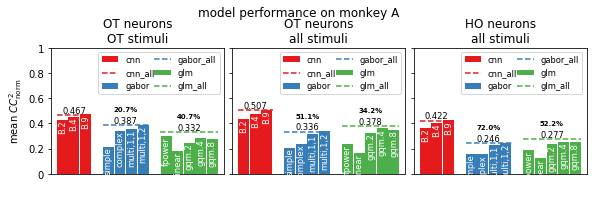

In [12]:
draw_one_stuff('MkA_Shape', 'A')

OT OT
cnn
[('B.2', 0.46179291363985231), ('B.4', 0.49076157199992482), ('B.9', 0.51472515802890906)]
0.503059174499
gabor
0.39740169231
glm
0.346003670145
all OT
cnn
[('B.2', 0.46561229568477075), ('B.4', 0.50701255512851739), ('B.9', 0.54094345293301305)]
0.537155962996
gabor
0.3783894028
glm
0.436168054958
all HO
cnn
[('B.2', 0.34859243879260904), ('B.4', 0.37859250920394466), ('B.9', 0.39694760855912753)]
0.395258261555
gabor
0.25083861208
glm
0.288130409843


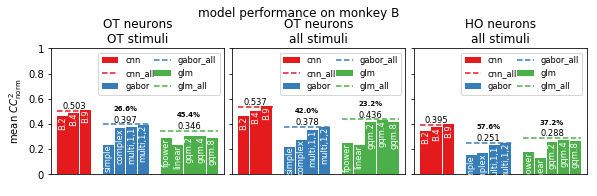

In [13]:
draw_one_stuff('MkE2_Shape', 'E2')